In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# **EDA & Data Preprocessing on Google App Store Rating Dataset.**

<img src = "https://designfornative.com/content/images/2023/01/Google-Play-cover-image.png">

## Context:

## Objective:

## Data Dictionary

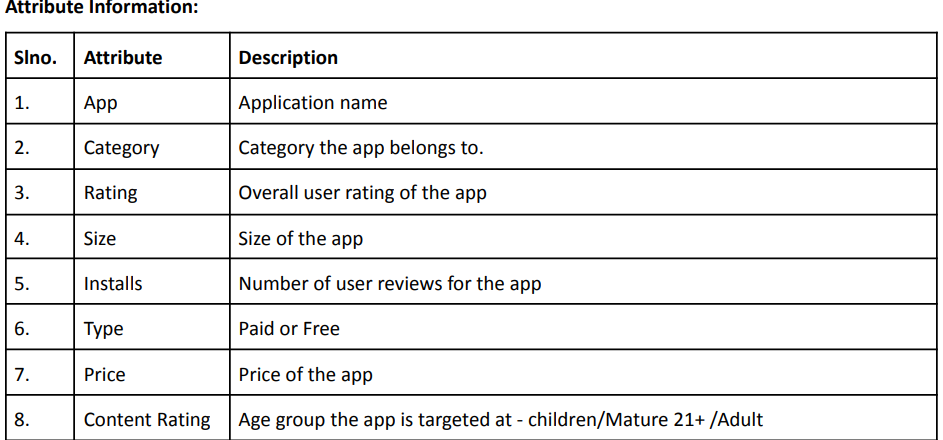

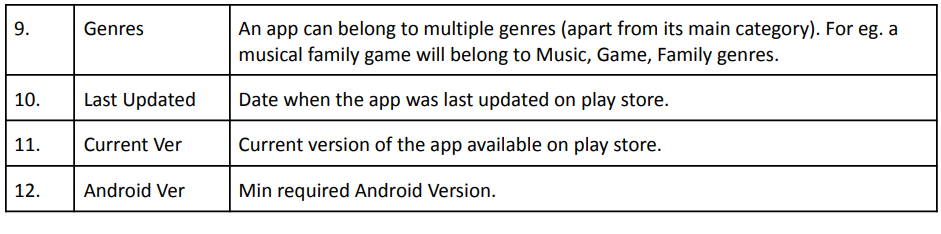

# Questions:-

## Q1) Import required libraries and read the dataset.


In [2]:
# importing required libraries.
import numpy as np
import pandas as pd

In [3]:
# importing required libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sweetviz

In [5]:
# Reading the dataset and naming it as data.
data = pd.read_csv("Apps_data.csv")

## Q2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [6]:
# Calculating number of rows & columns.
data.shape

(10841, 13)

In [7]:
# Calculating top 5 Rows of the dataset.
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Calculating bottom 5 Rows of the dataset.
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
# Basic information about data and it's dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Q3) . Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [10]:
#Calculating Desciptive statistics of the numerical features.
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
#Calculating Desciptive statistics of all the features.
data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
"""The Features that are required to be worked upon for model building are : """
print("1.. Rating")
print("2. Type")
print("3. Content Rating")
print("4. Price")
print("5. Category")
print("6. Reviews")

'The Features that are required to be worked upon for model building are : '

1.. Rating
2. Type
3. Content Rating
4. Price
5. Category
6. Reviews


## Q4) Check if there are any duplicate records in the dataset? if any drop them.

In [13]:
#Finding duplicate Records.
duplicates = data[data.duplicated()]

In [14]:
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [15]:
# Dropping all the duplicate records in the data
data.drop_duplicates(inplace=True)

In [16]:
# Recalculating the shape of the dataset
data.shape

(10358, 13)

## Q5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [17]:
# Getting all the unique categories from Category Column
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
invalid = data[data["Category"] == "1.9"]

In [19]:
print("The invalid Category is :")
invalid

The invalid Category is :


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
#Dropping off invalid Category
data.drop(10472, inplace=True)

In [21]:
data.shape

(10357, 13)

In [22]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Q6)  Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [23]:
print("The total number of rows in the column Rating is :" , data.shape[0])
print("The count of missing values present in the column Rating is :",data.Rating.isna().sum())

The total number of rows in the column Rating is : 10357
The count of missing values present in the column Rating is : 1465


In [24]:
#Finding indexes records with missing ratings.
blank_rating = data[data["Rating"].isna()].index

In [25]:
blank_rating

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1465)

In [26]:
##Dropping off records with missing rating
data.drop(blank_rating, inplace=True)

In [27]:
print("The Data after dropping the rows having null Ratings consists of " , data.shape[0],"rows and ", data.shape[1],"columns")

The Data after dropping the rows having null Ratings consists of  8892 rows and  13 columns


In [28]:
# Defining a fuction to classify the ratings.
def Rating_category(value):
    if value <= 3.5:
        return "Low"
    elif value > 3.5:
        return "High"

In [29]:
# Creating the column Rating_category and classifying records.
data["Rating_category"] = data['Rating'].map(Rating_category)

In [30]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High


## Q7)  Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [31]:
#Distribution of Rating_category
distribution = data["Rating_category"].value_counts()

In [32]:
distribution

High    8012
Low      880
Name: Rating_category, dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of Rating_category')

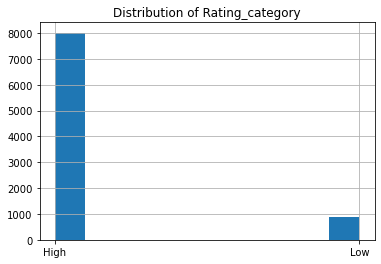

In [33]:
#plotting a histogram to see the distribution
data["Rating_category"].hist()
plt.title("Distribution of Rating_category")

##### Comment on Distribution

## Q8)  Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.

(Hint: Use log transformation)

In [34]:
type(data["Reviews"])

pandas.core.series.Series

In [35]:
# Checking datatype of Reviesws Column
data["Reviews"].dtypes

dtype('O')

In [36]:
data[data["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


In [37]:
data["Reviews"] = data["Reviews"].str.replace(".0M","000000")

C:\Users\HP\AppData\Local\Temp/ipykernel_4888/1628269787.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Reviews"] = data["Reviews"].str.replace(".0M","000000")


In [38]:
# Changing the datatype to integer for performing Transformation.
data["Reviews"] = data["Reviews"].astype(int)

In [39]:
data.dtypes["Reviews"]

dtype('int32')

In [40]:
data["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

In [41]:
# Seeing the Descriptive Statistics.
data.Reviews.describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

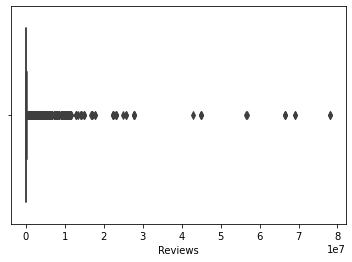

In [42]:
sns.boxplot(data["Reviews"])

In [43]:
# Applying Log Transformation to the column using Log10.
log10 = np.log10(data["Reviews"])

In [44]:
# Checking The Descriptive Statistics after applying Log Transformation.
log10.describe()

count    8892.000000
mean        3.576368
std         1.685149
min         0.000000
25%         2.214844
50%         3.673435
75%         4.852887
max         7.892975
Name: Reviews, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

Text(0.5, 1.0, "BoxPlot for Analyzing Outlier's after Log transformation.")

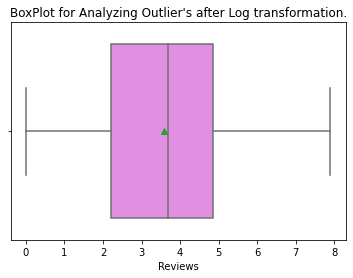

In [45]:
# Plotting a boxplot to Analyze any Outliers
sns.boxplot(log10, color="violet" , showmeans = True)
plt.title("BoxPlot for Analyzing Outlier's after Log transformation.")

In [46]:
# Replacing reviews values with their transformed values.
data["Reviews"] = log10

In [47]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High


##### Inference

## Q9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. 

Hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device'

In [48]:
data["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [49]:
data["Size"] = data["Size"].apply(lambda x : x.replace(",",""))

In [50]:
# Replacing alphabetical to numerical
data["Size"] = data["Size"].str.replace("M","000000")

In [51]:
data["Size"] = data["Size"].str.replace("k","000")

In [52]:
# Finding the idexes of records having Size "Varies_with_device".
Varies_with_device = data[data["Size"] == "Varies with device"].index

In [53]:
Varies_with_device

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1468)

In [54]:
#dropping records having Size "Varies_with_device".
data.drop(Varies_with_device,inplace=True)

In [55]:
# Checking the number of rows present in the dataset now.
data.shape[0]

7424

In [56]:
Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [57]:
# Conversion of column named SIZE from Object dtype to the best Suitable dtype.
data["Size"].convert_dtypes()

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7424, dtype: string

## Q10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [58]:
data["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [59]:
#Replacing the Unwanted Characters in the dataset 
data["Installs"] = data["Installs"].str.replace("+","").replace(",","")

C:\Users\HP\AppData\Local\Temp/ipykernel_4888/3105114775.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace("+","").replace(",","")


In [60]:
# Calling the column after Replacing unwanted characters.
data["Installs"]

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: object

In [61]:
# using convert_dtypes() to perform conversion because it convert's automatically to the best data type after analyzing it.

In [62]:
# Conversion of column named Installs from Object dtype to the best Suitable dtype.
data["Installs"].convert_dtypes()

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: string

In [63]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7000000,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8000000,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


## Q11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [64]:
data["Price"]

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

In [65]:
data["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [66]:
data["Price"] = data["Price"].apply(lambda x : x.replace(",",""))

In [67]:
#Replacing the Unwanted Characters in the dataset 
data["Price"] = data["Price"].str.replace("$", "")

C:\Users\HP\AppData\Local\Temp/ipykernel_4888/1967011825.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Price"] = data["Price"].str.replace("$", "")


In [68]:
# Calling the unique values of the column after Replacing unwanted characters.
data["Price"].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [69]:
# using convert_dtypes() to perform conversion because it convert's automatically to the best data type after analyzing it.

In [70]:
# Calling the unique values of the column after Replacing unwanted characters.
data["Price"].unique()

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: string

## Q12)  Drop the columns which you think redundant for the analysis.

(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [71]:
#Getting all the columns of the dataset.
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [72]:
# Dropping the redundant columns from the datset.
data.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [73]:
# Viewing the top 5 records of data after removing the dataset
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000,"10,000",Free,0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000,"500,000",Free,0,Everyone,High
2,ART_AND_DESIGN,4.942058,8.7000000,"5,000,000",Free,0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000,"50,000,000",Free,0,Teen,High
4,ART_AND_DESIGN,2.985426,2.8000000,"100,000",Free,0,Everyone,High


## Q13) Encode the categorical columns

In [74]:
# Getting The info of the columns present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(1), object(7)
memory usage: 522.0+ KB


#### Using Label Encoding To Encode Categorical columns.

###### 1. Category

In [75]:
# Getting count of Unique categories from Category column.
data.Category.nunique()

33

In [76]:
# Creating a list of unique categories.
categories = list(data["Category"].unique())

In [77]:
categories

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [78]:
# Importing Label Encoder in order to perform label encoding.
from sklearn.preprocessing import LabelEncoder

In [79]:
labelencoder = LabelEncoder()

In [80]:
# Transforming the Category Column using Label Encoding.
data["Category"] = labelencoder.fit_transform(data["Category"])


In [81]:
data.head(1)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,Everyone,High


In [82]:
# Checking the values of all categories after label Encoding.
data.Category.value_counts()

11    1591
14     959
29     634
23     279
20     277
18     273
12     263
28     232
25     231
4      225
24     225
6      206
15     199
27     170
21     162
26     159
30     147
3      143
7      141
31     116
19      95
8       95
13      82
9       67
1       63
17      62
0       59
32      51
16      50
5       49
22      44
10      38
2       37
Name: Category, dtype: int64

###### 2. Content Rating

In [83]:
# Getting Unique ratings from Content Rating column.
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [84]:
# Transforming the Category Column using Label Encoding.
data["Content Rating"] = labelencoder.fit_transform(data["Content Rating"])

In [85]:
data.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,1,High
1,0,2.985426,14000000,"500,000",Free,0,1,High


In [86]:
# Checking the values of all Content Rating after label Encoding.
data["Content Rating"].value_counts()

1    5958
4     832
3     332
2     299
0       2
5       1
Name: Content Rating, dtype: int64

###### 3. Type

In [87]:
# Getting Unique types from Type column.
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [88]:
data.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,1,High
1,0,2.985426,14000000,"500,000",Free,0,1,High


In [89]:
# Transforming the Type Column using Label Encoding.
data["Type"] = labelencoder.fit_transform(data["Type"])

In [90]:
# Checking the values of all Type after label Encoding.
data["Type"].value_counts()

0    6877
1     547
Name: Type, dtype: int64

In [91]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,High
1,0,2.985426,14000000,"500,000",0,0,1,High
2,0,4.942058,8.7000000,"5,000,000",0,0,1,High
3,0,5.333737,25000000,"50,000,000",0,0,4,High
4,0,2.985426,2.8000000,"100,000",0,0,1,High


###### 4.Rating Category

In [92]:
# Getting Unique categories from Rating_category column.
data["Rating_category"].unique()

array(['High', 'Low'], dtype=object)

In [93]:
data.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,High
1,0,2.985426,14000000,"500,000",0,0,1,High


In [94]:
data["Rating_category"].value_counts()

High    6599
Low      825
Name: Rating_category, dtype: int64

In [95]:
# Transforming the Rating_category Column using Label Encoding.
data["Rating_category"] = labelencoder.fit_transform(data["Rating_category"])

In [96]:
# Checking the values of all Rating_category after label Encoding.
data["Rating_category"].value_counts()

0    6599
1     825
Name: Rating_category, dtype: int64

In [97]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,0
1,0,2.985426,14000000,"500,000",0,0,1,0
2,0,4.942058,8.7000000,"5,000,000",0,0,1,0
3,0,5.333737,25000000,"50,000,000",0,0,4,0
4,0,2.985426,2.8000000,"100,000",0,0,1,0


## Q14) Segregate the target and independent features 

(Hint: Use Rating_category as the target)

In [98]:
# Creating variable X with all Independent Variables.
X = data.drop("Rating_category", axis=1)

# Creating variable Y with Dependent Variable.
Y = data[["Rating_category"]]

In [99]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000,"10,000",0,0,1
1,0,2.985426,14000000,"500,000",0,0,1
2,0,4.942058,8.7000000,"5,000,000",0,0,1
3,0,5.333737,25000000,"50,000,000",0,0,4
4,0,2.985426,2.8000000,"100,000",0,0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000,"1,000",0,0,1
10834,11,0.845098,2.6000000,500,0,0,1
10836,11,1.579784,53000000,"5,000",0,0,1
10837,11,0.602060,3.6000000,100,0,0,1


In [100]:
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


## Q15) Split the dataset into train and test

In [101]:
# importing library to splitting the dataset.
from sklearn.model_selection import train_test_split

In [102]:
#Spliting the data set into Train and Test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [103]:
print("X_train")
X_train
print("X_test")
X_test
print("Y_train")
Y_train
print("Y_test")
Y_test

X_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2.9000000,100,0,0,1
1298,15,5.264019,57000000,"5,000,000",0,0,1
6599,20,2.489958,5.9000000,"10,000",0,0,1
7328,30,2.328380,6.1000000,"5,000",1,3.99,1
5681,18,1.755875,5.8000000,"10,000",0,0,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000,"50,000",0,0,1
7755,11,1.462398,37000000,"1,000",0,0,2
5978,11,0.000000,2.0000000,50,1,1.49,1
347,6,6.679963,11000000,"500,000,000",0,0,1


X_test


,Category,Reviews,Size,Installs,Type,Price,Content Rating
5708,29,2.845718,7.3000000,"100,000",0,0,1
7215,11,2.559907,14000000,"1,000",1,2.99,2
1350,15,4.852901,49000000,"1,000,000",0,0,1
5727,29,4.895583,6.3000000,"1,000,000",0,0,1
5326,11,3.997910,3.7000000,"100,000",0,0,4
...,...,...,...,...,...,...,...
6351,29,3.066699,350000,"100,000",0,0,1
1634,18,3.493319,13000000,"100,000",0,0,1
9865,3,1.518514,37000000,"1,000",0,0,1
10396,11,5.345748,94000000,"5,000,000",0,0,4


Y_train


,Rating_category
8888,0
1298,0
6599,0
7328,0
5681,0
...,...
1522,0
7755,0
5978,1
347,0


Y_test


,Rating_category
5708,0
7215,0
1350,0
5727,0
5326,0
...,...
6351,0
1634,0
9865,0
10396,0


## Q16)  Standardize the data, so that the values are within a particular range

In [107]:
#Importing necessary libraries to Standardize the data.
from sklearn.preprocessing import StandardScaler

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   int32  
 7   Rating_category  7424 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 406.0+ KB


#### Since the columns named as Size, Installs, Price are of object data type, we need to convert the data to int dtype in order to perform Standardizing

In [109]:
data['Installs'] = data['Installs'].apply(lambda x : x.replace(',','').replace('+','')).astype(int)

In [110]:
data['Size'] = data['Size'].apply(lambda x : x.replace(',','')).astype(float)

In [111]:
data['Price'] = data['Price'].apply(lambda x : x.replace(',','')).astype(float)

In [112]:
#defining standard scaler
scaler = StandardScaler()

In [113]:
# Performing Standardization of data
data = scaler.fit_transform(data)

In [114]:
#Calling our numpy arrays after performing Standardization
data

array([[-2.03766618, -0.67995305, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.27499084, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.83713998, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29099702, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.83714018, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [115]:
data = pd.DataFrame(data)

In [116]:
data

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.074223,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.274991,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.837140,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.166698,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.837140,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.812285,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.837140,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.290997,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.837140,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


# 

# By SheikTheAnalyst !